In [1]:
pip install imbalanced-learn gradio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

I. Introduction & Domain Knowledge
This project focuses on predicting credit card defaults using machine learning techniques.
Credit card default prediction is crucial for financial institutions to manage risk effectively.

II. Dataset Analysis & Understanding

A. Data Characteristics
Dataset shape: (29999, 25)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         29999 non-null  int64
 1   LIMIT_BAL  29999 non-null  int64
 2   SEX        29999 non-null  int64
 3   EDUCATION  29999 non-null  int64
 4   MARRIAGE   29999 non-null  int64
 5   AGE        29999 non-null  int64
 6   PAY_0      29999 non-null  int64
 7   PAY_2      29999 non-null  int64
 8   PAY_3      29999 non-null  int64
 9   PAY_4      29999 non-null  int64
 10  PAY_5      29999 non-null  int64
 11  PAY_6      29999 non-null  int64
 12  BILL_AMT1  29999 non-null 

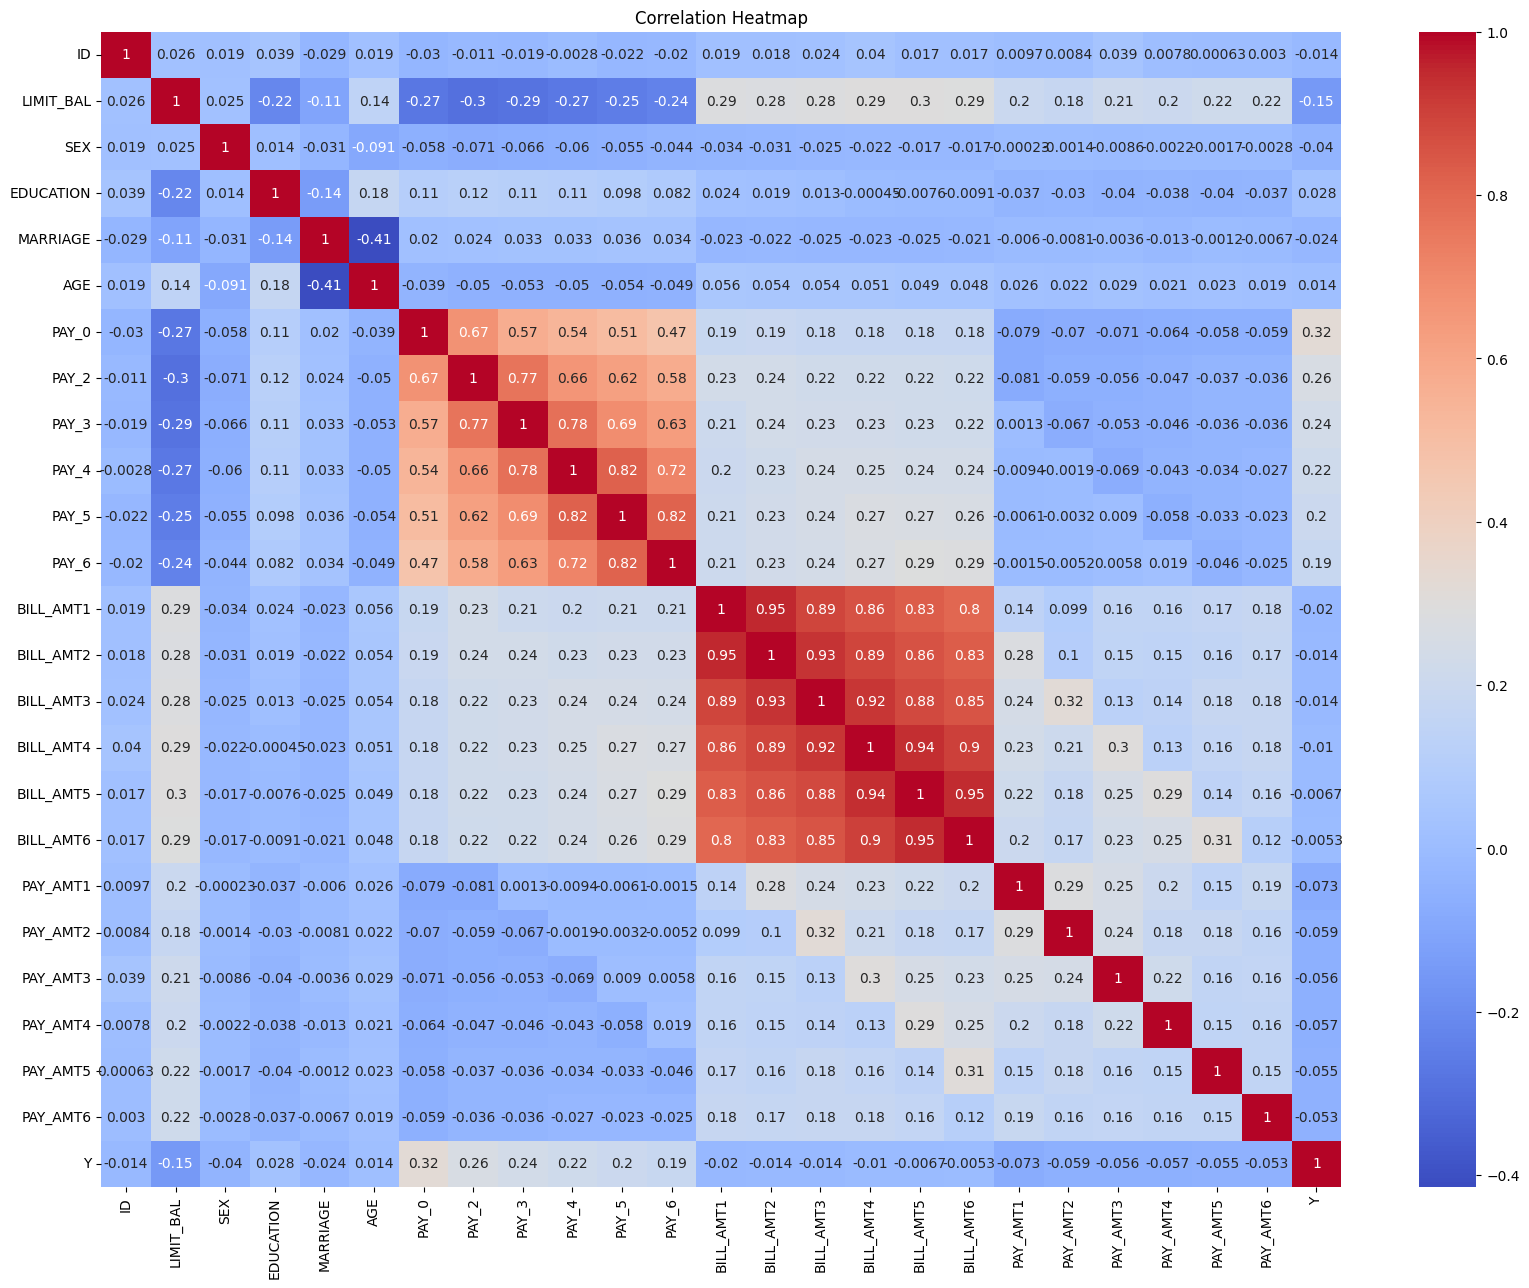

Correlation heatmap saved as 'correlation_heatmap.png'

Highly correlated features: ['PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

C. Data Cleaning/Preprocessing
Missing values:
ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

Duplicate rows: 0

D. Data Visualization – Independent Features


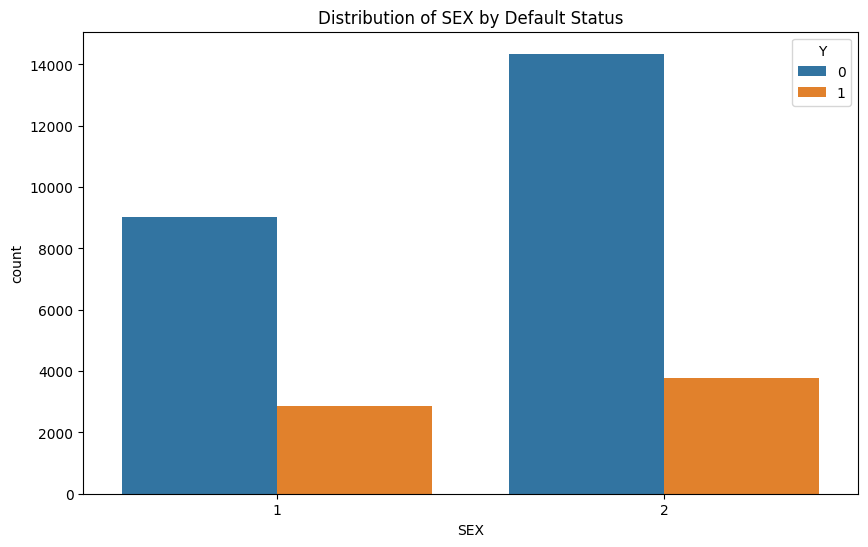

Distribution plot for SEX saved as 'SEX_distribution.png'


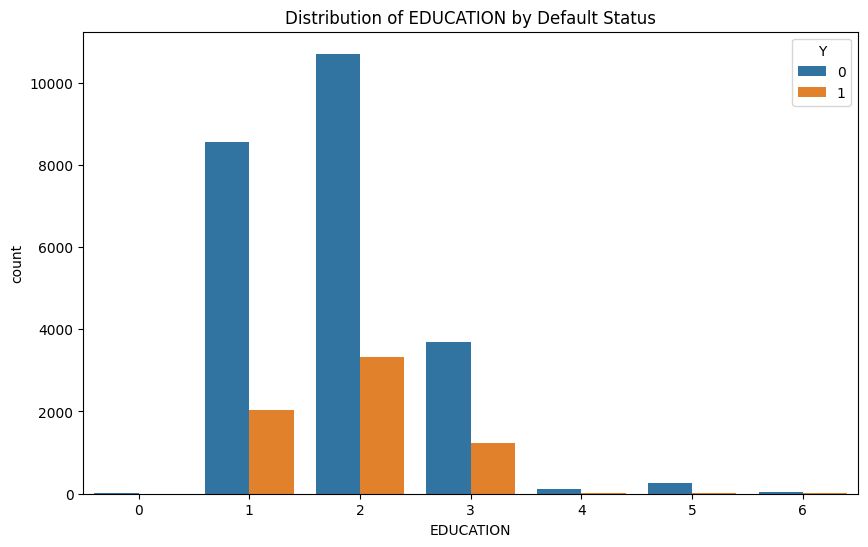

Distribution plot for EDUCATION saved as 'EDUCATION_distribution.png'


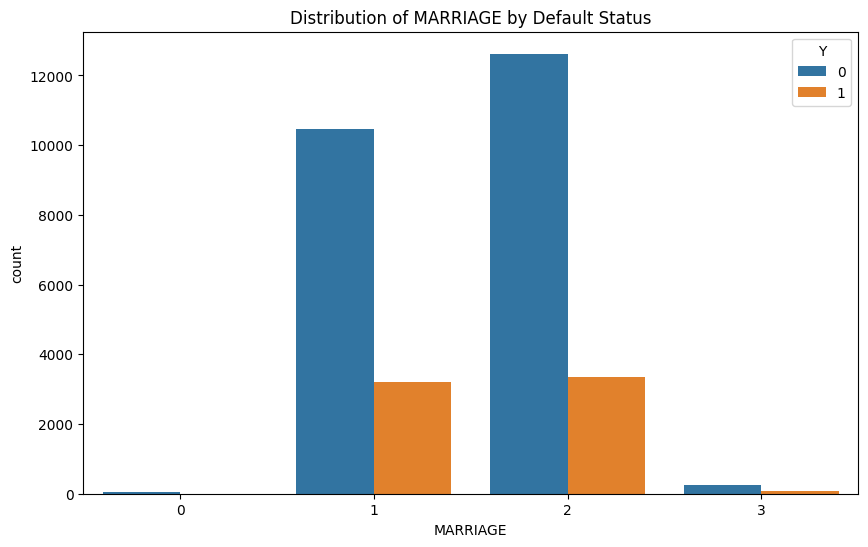

Distribution plot for MARRIAGE saved as 'MARRIAGE_distribution.png'


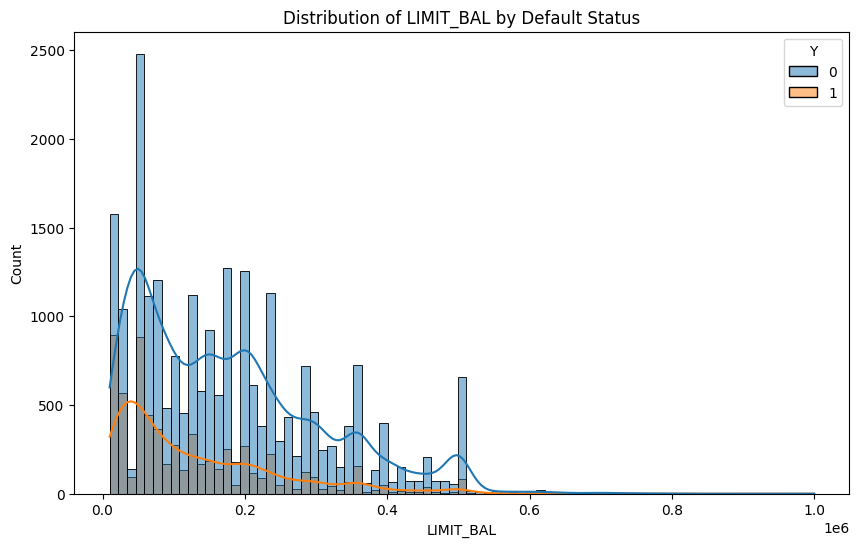

Distribution plot for LIMIT_BAL saved as 'LIMIT_BAL_distribution.png'


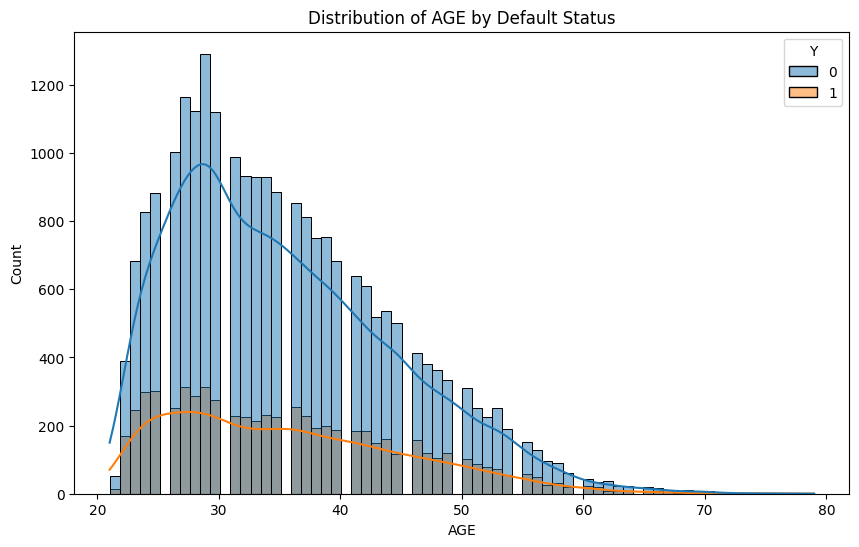

Distribution plot for AGE saved as 'AGE_distribution.png'


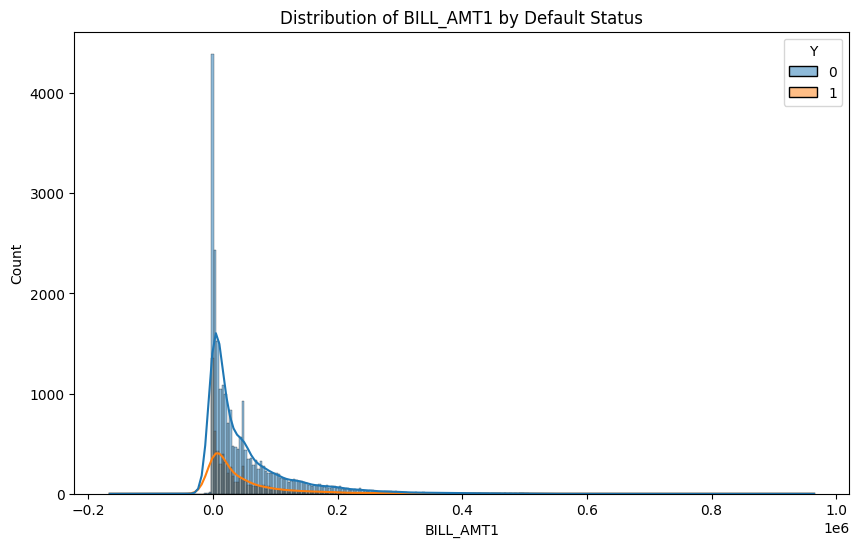

Distribution plot for BILL_AMT1 saved as 'BILL_AMT1_distribution.png'


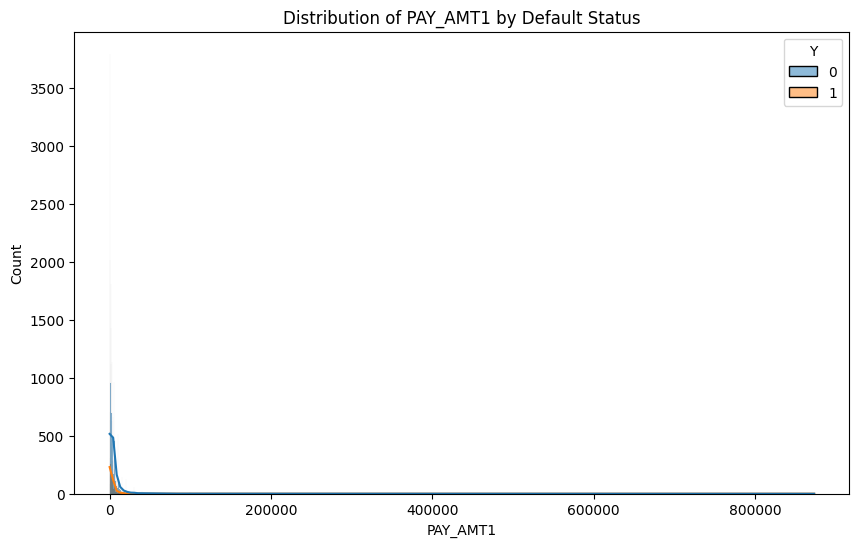

Distribution plot for PAY_AMT1 saved as 'PAY_AMT1_distribution.png'

III. Data Transformation & Models Used

A. Feature Scaling and Encoding

B. Logistic Regression Classifier

C. Random Forest Ensemble Classifier

D. Handling the Data Imbalance
Class distribution before SMOTE:
Y
0    0.778907
1    0.221093
Name: proportion, dtype: float64
SMOTE is integrated into the pipelines to handle class imbalance.

IV. Experiments & Model Results

A. Logistic Regression Tuning & Evaluation
Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l2'}

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      4671
           1       0.38      0.68      0.49      1329

    accuracy                           0.68      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.68      0.71      6000



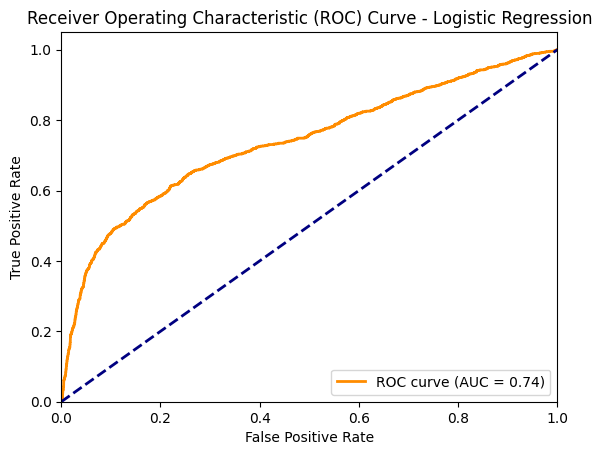

ROC curve for Logistic Regression saved as 'lr_roc_curve.png'

B. Random Forest Tuning & Evaluation
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4671
           1       0.51      0.58      0.54      1329

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000



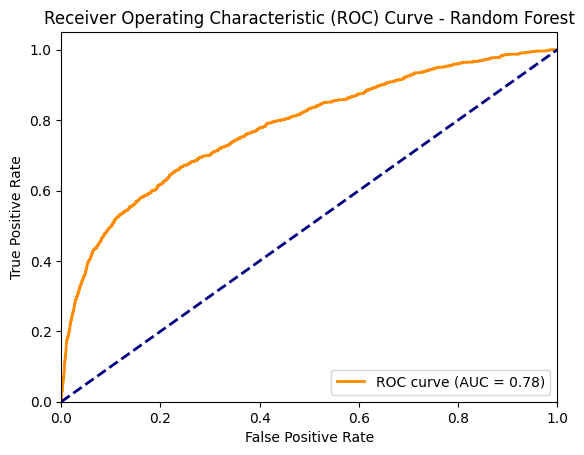

ROC curve for Random Forest saved as 'rf_roc_curve.png'

Extracting feature importances...


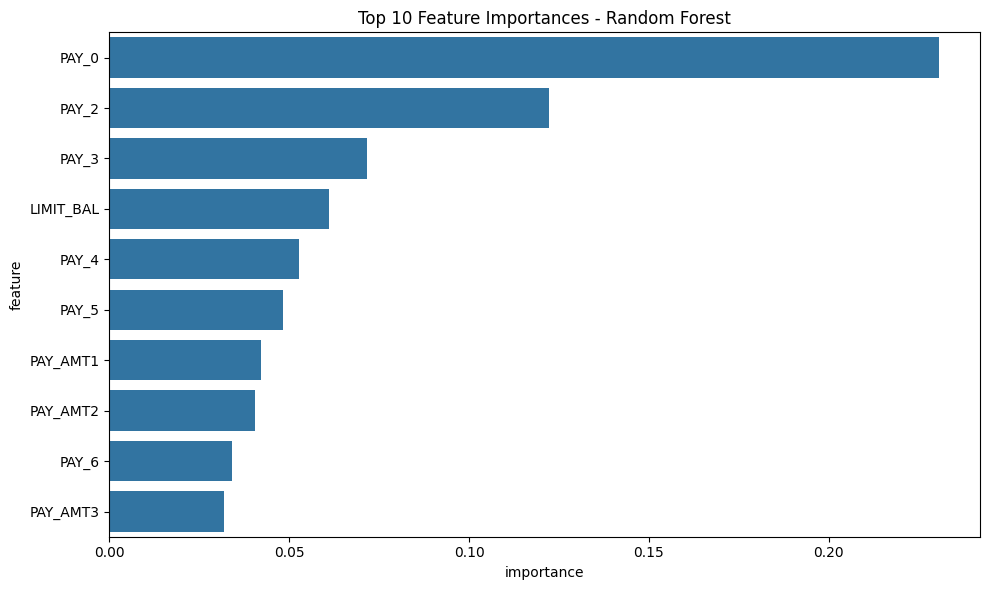

Feature importance plot for Random Forest saved as 'rf_feature_importance.png'

V. Conclusion
A. Summary of Findings
Logistic Regression AUC: 0.7376
Random Forest AUC: 0.7783

Best performing model: Random Forest

B. Lessons Learned
- Importance of handling class imbalance
- Effectiveness of feature scaling and encoding
- Value of hyperparameter tuning

C. Challenges Faced
- Dealing with high dimensionality after one-hot encoding
- Balancing model complexity and performance

D. Future Considerations
- Explore other algorithms (e.g., Gradient Boosting)
- Investigate feature engineering techniques
- Consider ensemble methods combining multiple models


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV

# I. Introduction & Domain Knowledge
print("I. Introduction & Domain Knowledge")
print("This project focuses on predicting credit card defaults using machine learning techniques.")
print("Credit card default prediction is crucial for financial institutions to manage risk effectively.")

# II. Dataset Analysis & Understanding

print("\nII. Dataset Analysis & Understanding")

# A. Data Characteristics
print("\nA. Data Characteristics")
df = pd.read_excel('default of credit card clients.xls', sheet_name='Data', header=1)
df = df.drop(df.index[0]).reset_index(drop=True)
df = df.rename(columns={'default payment next month': 'Y'})

print(f"Dataset shape: {df.shape}")
print("\nDataset info:")
print(df.info())
print("\nDataset summary statistics:")
print(df.describe())

# B. Feature Analysis & Selection
print("\nB. Feature Analysis & Selection")
correlation = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show('correlation_heatmap.png')
plt.close()
print("Correlation heatmap saved as 'correlation_heatmap.png'")

# Identify highly correlated features
high_corr = correlation.abs() > 0.8
high_corr_features = high_corr.index[high_corr.sum() > 1].tolist()
print(f"\nHighly correlated features: {high_corr_features}")

# C. Data Cleaning/Preprocessing
print("\nC. Data Cleaning/Preprocessing")
print(f"Missing values:\n{df.isnull().sum()}")
print(f"\nDuplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# D. Data Visualization – Independent Features
print("\nD. Data Visualization – Independent Features")
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Y', data=df)
    plt.title(f'Distribution of {col} by Default Status')
    plt.show(f'{col}_distribution.png')
    plt.close()
    print(f"Distribution plot for {col} saved as '{col}_distribution.png'")

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Y', kde=True)
    plt.title(f'Distribution of {col} by Default Status')
    plt.show(f'{col}_distribution.png')
    plt.close()
    print(f"Distribution plot for {col} saved as '{col}_distribution.png'")

# III. Data Transformation & Models Used

print("\nIII. Data Transformation & Models Used")

# Prepare features and target
X = df.drop('Y', axis=1)
y = df['Y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A. Feature Scaling and Encoding
print("\nA. Feature Scaling and Encoding")
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create and fit the encoders separately
scaler = StandardScaler()
onehot = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform numeric features
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# Fit and transform categorical features
X_train_categorical = onehot.fit_transform(X_train[categorical_features])
X_test_categorical = onehot.transform(X_test[categorical_features])

# Combine numeric and categorical features
X_train_preprocessed = np.hstack((X_train_numeric, X_train_categorical))
X_test_preprocessed = np.hstack((X_test_numeric, X_test_categorical))

# Get feature names
numeric_feature_names = numeric_features.tolist()
categorical_feature_names = onehot.get_feature_names_out(categorical_features).tolist()
all_feature_names = numeric_feature_names + categorical_feature_names

# B. Logistic Regression Classifier
print("\nB. Logistic Regression Classifier")
lr_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

# C. Random Forest Ensemble Classifier
print("\nC. Random Forest Ensemble Classifier")
rf_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# D. Handling the Data Imbalance
print("\nD. Handling the Data Imbalance")
print(f"Class distribution before SMOTE:\n{y_train.value_counts(normalize=True)}")
print("SMOTE is integrated into the pipelines to handle class imbalance.")

# IV. Experiments & Model Results

print("\nIV. Experiments & Model Results")

# A. Logistic Regression Tuning & Evaluation
print("\nA. Logistic Regression Tuning & Evaluation")
lr_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='roc_auc')
lr_grid_search.fit(X_train_preprocessed, y_train)

print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")
lr_best_model = lr_grid_search.best_estimator_
lr_predictions = lr_best_model.predict(X_test_preprocessed)

print("\nLogistic Regression Results:")
print(classification_report(y_test, lr_predictions))

lr_probs = lr_best_model.predict_proba(X_test_preprocessed)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show('lr_roc_curve.png')
plt.close()
print("ROC curve for Logistic Regression saved as 'lr_roc_curve.png'")

# B. Random Forest Tuning & Evaluation
print("\nB. Random Forest Tuning & Evaluation")
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [5, 10]
}
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='roc_auc')
rf_grid_search.fit(X_train_preprocessed, y_train)

print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test_preprocessed)

print("\nRandom Forest Results:")
print(classification_report(y_test, rf_predictions))

rf_probs = rf_best_model.predict_proba(X_test_preprocessed)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure()
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show('rf_roc_curve.png')
plt.close()
print("ROC curve for Random Forest saved as 'rf_roc_curve.png'")

# Feature Importance for Random Forest
print("\nExtracting feature importances...")
feature_importance = rf_best_model.named_steps['classifier'].feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show('rf_feature_importance.png')
plt.close()
print("Feature importance plot for Random Forest saved as 'rf_feature_importance.png'")

# V. Conclusion
print("\nV. Conclusion")
print("A. Summary of Findings")
print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"\nBest performing model: {'Logistic Regression' if lr_auc > rf_auc else 'Random Forest'}")

print("\nB. Lessons Learned")
print("- Importance of handling class imbalance")
print("- Effectiveness of feature scaling and encoding")
print("- Value of hyperparameter tuning")

print("\nC. Challenges Faced")
print("- Dealing with high dimensionality after one-hot encoding")
print("- Balancing model complexity and performance")

print("\nD. Future Considerations")
print("- Explore other algorithms (e.g., Gradient Boosting)")
print("- Investigate feature engineering techniques")
print("- Consider ensemble methods combining multiple models")

In [4]:
# Gradio App
import gradio as gr


def predict_default(limit_bal, sex, education, marriage, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6,
                    bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6,
                    pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6):
    input_data = np.array([[limit_bal, sex, education, marriage, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6,
                            bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6,
                            pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6]])

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    lr_pred = lr_best_model.predict_proba(input_data_scaled)[0][1]
    rf_pred = rf_best_model.predict_proba(input_data_scaled)[0][1]

    return {"Logistic Regression": float(lr_pred), "Random Forest": float(rf_pred)}

iface = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(label="Credit Limit"),
        gr.Number(label="Sex (1=male, 2=female)"),
        gr.Number(label="Education (1=graduate school, 2=university, 3=high school, 4=others)"),
        gr.Number(label="Marital Status (1=married, 2=single, 3=others)"),
        gr.Number(label="Age"),
        gr.Number(label="Repayment Status in This Month"),
        gr.Number(label="Repayment Status in Last Month"),
        gr.Number(label="Repayment Status 2 Months Ago"),
        gr.Number(label="Repayment Status 3 Months Ago"),
        gr.Number(label="Repayment Status 4 Months Ago"),
        gr.Number(label="Repayment Status 5 Months Ago"),
        gr.Number(label="Amount of Bill Statement 1"),
        gr.Number(label="Amount of Bill Statement 2"),
        gr.Number(label="Amount of Bill Statement 3"),
        gr.Number(label="Amount of Bill Statement 4"),
        gr.Number(label="Amount of Bill Statement 5"),
        gr.Number(label="Amount of Bill Statement 6"),
        gr.Number(label="Amount Paid 1"),
        gr.Number(label="Amount Paid 2"),
        gr.Number(label="Amount Paid 3"),
        gr.Number(label="Amount Paid 4"),
        gr.Number(label="Amount Paid 5"),
        gr.Number(label="Amount Paid 6"),
    ],
    outputs=[gr.Label(label="Default Probability")],
    title="Credit Card Default Prediction",
    description="Enter client information to predict the probability of credit card default."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
